In [2]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\IPL Data"
os.chdir(path)
os.listdir(path)
ball=pd.read_excel("Ball_by_Ball.xlsx")
match=pd.read_excel("Match.xlsx")
player = pd.read_excel("Player.xlsx")
season = pd.read_excel('Season.xlsx')
team =pd.read_excel("Team.xlsx")

In [5]:
##Univariate Analysis
#PS1- Does batting first help you to score more runs?

Runs_by_innings = ball.groupby(['Innings_Id'])['Batsman_Scored'].sum().reset_index()
Runs_by_innings

,Innings_Id,Batsman_Scored
0,1,86811
1,2,78989
2,3,80
3,4,70


In [11]:
First_Inning_runs = Runs_by_innings[(Runs_by_innings["Innings_Id"] == 1)  | (Runs_by_innings['Innings_Id'] == 3)]['Batsman_Scored'].sum()
Second_Inning_runs= Runs_by_innings[(Runs_by_innings["Innings_Id"] == 2)  | (Runs_by_innings['Innings_Id'] == 4)]['Batsman_Scored'].sum()
First_Inning_runs

86891

In [12]:
Inning=['First Inning', 'Second Inning']
Runs =[First_Inning_runs, Second_Inning_runs]
df = pd.DataFrame(list(zip(Inning, Runs)), columns=['Inning', 'Runs'])
df

,Inning,Runs
0,First Inning,86891
1,Second Inning,79059


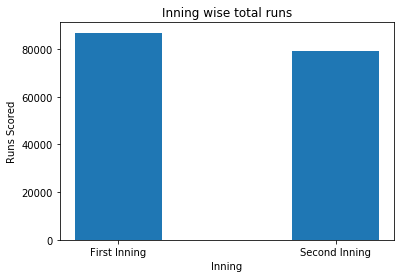

In [57]:
from matplotlib import pyplot as plt


plt.bar(df['Inning'],df['Runs'],width=0.4)
plt.xlabel('Inning')
plt.ylabel('Runs Scored')
plt.title('Inning wise total runs')
plt.show()

In [90]:
#Univariate
##PS2 =Top 10 batsman based on runs

Top_Batsman = ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()
Top_Batsman =Top_Batsman.sort_values(by ='Batsman_Scored',ascending=False)
Top_Batsman
Player_Name=player[["Player_Id","Player_Name"]]
Player_Name.head()
Top_Batsman=pd.merge(Top_Batsman,player[['Player_Id','Player_Name']],left_on="Striker_Id",right_on='Player_Id')
Top_Batsman.head(10)

,Striker_Id,Batsman_Scored,Player_Id,Player_Name
0,21,4106,21,SK Raina
1,8,4105,8,V Kohli
2,57,3874,57,RG Sharma
3,40,3634,40,G Gambhir
4,162,3447,162,CH Gayle
5,46,3390,46,RV Uthappa
6,187,3373,187,DA Warner
7,110,3270,110,AB de Villiers
8,20,3270,20,MS Dhoni
9,42,3082,42,S Dhawan


In [89]:
#Top 3 batsman based on centuries

batsman_score_match=ball.groupby(['Striker_Id','Match_Id'])['Batsman_Scored'].sum().reset_index()
batsman_score_match
batsman_score_centuries=batsman_score_match[batsman_score_match['Batsman_Scored']> 99]
Player_Name=player[["Player_Id","Player_Name"]]
Player_Name.head()
Total_100=pd.merge(batsman_score_centuries,Player_Name,left_on='Striker_Id',right_on='Player_Id')
Total_100=Total_100.groupby('Player_Name').count()
Total_100 = Total_100.sort_values(by='Batsman_Scored',ascending=False)
Total_100.head(10)



,Striker_Id,Match_Id,Batsman_Scored,Player_Id
Player_Name,,,,
CH Gayle,5,5,5,5
V Kohli,4,4,4,4
AB de Villiers,3,3,3,3
AC Gilchrist,2,2,2,2
BB McCullum,2,2,2,2
V Sehwag,2,2,2,2
DA Warner,2,2,2,2
SR Watson,2,2,2,2
M Vijay,2,2,2,2


In [119]:
#who dominant ipl lest hand or right hand batsman?

Top_Batsman = ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()
Top_Batsman
player=player[['Player_Id','Batting_Hand']]
player
Batsman_Style=pd.merge(Top_Batsman,player,left_on='Striker_Id',right_on='Player_Id')
Batsman_Style
Batsman_St=Batsman_Style.groupby('Batting_Hand')['Batsman_Scored'].sum().reset_index()
Batsman_St

,Batting_Hand,Batsman_Scored
0,Left_Hand,54462
1,Right_Hand,111488


In [149]:
##Desicion after the toss

Toss=match.groupby(['Toss_Decision']).size().reset_index()
Toss

,Toss_Decision,0
0,bat,262
1,field,315


In [164]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\IPL Data"
os.chdir(path)
os.listdir(path)
ball=pd.read_excel("Ball_by_Ball.xlsx")
match=pd.read_excel("Match.xlsx")
player = pd.read_excel("Player.xlsx")
season = pd.read_excel('Season.xlsx')
team =pd.read_excel("Team.xlsx")

In [185]:
#PS5: Country Wise contribution in runs(apart from india)
Top_Batsman = ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()
Top_Batsman =Top_Batsman.sort_values(by ='Batsman_Scored',ascending=False)
Top_Batsman.head()
country=player[['Player_Id','Country']]
country
ForgPlayer=pd.merge(Top_Batsman,country,left_on='Striker_Id',right_on='Player_Id')
ForgPlayer
ForgPlayer=ForgPlayer.groupby('Country')['Batsman_Scored'].sum().reset_index()
ForgPlayer=ForgPlayer[(ForgPlayer.Country != "India")]
ForgPlayer=ForgPlayer.sort_values(by="Batsman_Scored",ascending=False)
ForgPlayer

,Country,Batsman_Scored
0,Australia,26447
7,South Africa,17539
9,West Indies,11204
8,Sri Lanka,6853
5,New Zealand,5745
2,England,2943
6,Pakistan,1107
1,Bangladesh,503
4,Netherlands,326
10,Zimbabwea,31


In [186]:
#create the donut chart
#creating a small circle in middle
plt.pie(final_data['Batsman_Scored'], labels = final_data.Country,autopct='%2f%%',labeldistance=0.8,radius=2)

centre_circle = plt.Circle((0,0),0.8, fc= 'white')
#GCF(GET CURRENT FIGURE) AND GCA(GET CURRENT AXES)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()
 

NameError: name 'final_data' is not defined